# Logistic Regression
AU 17 CSE 5539-0010 "Social Media and Text Analysis" Homework #2  
Wei Xu, The Ohio State University   

In this assignment, we will walk you through the process of :

- implementing logistic regression from scratch 
- learning about gradient checking and feature scaling
- and applying it to a real-world problem that predicts whether a student will be admitted to a university. 


<div class="alert alert-danger">
IMPORTANG: In this assignment, except Numpy and Matplotlib, no other external Python packages are allowed. Please don't add or remove any code cells, as it might break our automatic grading system and affect your grade. Please sign the honor code below. 
</div>

**Honor Code:** I hereby agree to abide the Ohio State University's Code of Student Conduct, promise that the submitted assignment is my own work, and understand that my code is subject to plagiarism test.

**Signature**:     (Pragya Arora)

## 0. Importing Numpy and Matplotlib [Code provided - do not change]

In [12]:
import sys

# Check what version of Python is running
print (sys.version)

3.6.0 |Anaconda custom (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]


You will need to have Numpy installed for the right version of Python. Most likely, you are using Python 3.4 in this Jupyter Notebook; then you may [install Numpy accordingly](https://stackoverflow.com/questions/37933978/install-numpy-in-python-3-4-4-and-linux). For example, installng Numpy via pip by using the command line "sudo python3.4 -m pip install numpy". If failed, you may need to update pip first by "python3.4 -m pip install --upgrade pip".

In [13]:
# Run some setup code for this notebook. Don't modify anything in this cell.

import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# reload external python modules;
# http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Visualizing the Data  [Code provided - no need to change]

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. The provided dataset contains applicants' scores on two exams and the admission decisons. 

[Matplotlib](http://matplotlib.org/users/pyplot_tutorial.html) is a Python package for data visualization. Suppose you are using Python 3.4, you can install by first use command line "brew install freetype", then "sudo python3.4 -m pip install matplotlib". 


# of training examples =  100
# of features =  2


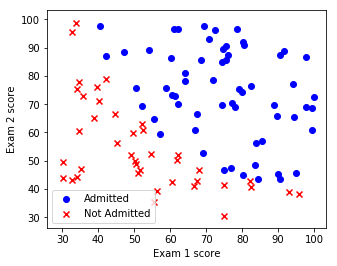

In [14]:
#load the dataset
data = np.loadtxt('AU17_hw2_data.txt', delimiter=',')

train_X = data[:, 0:2]
train_y = data[:, 2]

# Get the number of training examples and the number of features
m_samples, n_features = train_X.shape
print ("# of training examples = ", m_samples)
print ("# of features = ", n_features)

pos = np.where(train_y == 1)
neg = np.where(train_y == 0)
plt.scatter(train_X[pos, 0], train_X[pos, 1], marker='o', c='b')
plt.scatter(train_X[neg, 0], train_X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted','Not Admitted'])
plt.show()

## 2. Sigmoid Function [5 points]
You're going to first implement the sigmoid function and its gradient. The sigmoid function is defined as $sigmoid(\mathbf{z}) = \frac{1}{1+{e^{-\mathbf{z}}}}$.

In [15]:
def sigmoid(z):
    """ Sigmoid function """
    ###################################################################
    # Compute the sigmoid function for the input here.                #
    ###################################################################
    
    ### YOUR CODE HERE: be careful of the potential underflow or overflow here

#     if z > 0:
#         s = 1/(1+np.exp(-z))
#     else:
#         s = np.exp(z)/(1+np.exp(z))
    s = np.exp(-np.logaddexp(0,-z))
    
    ### END YOUR CODE
    
    return s

def sigmoid_grad(f):
    """ Sigmoid gradient function """
    ###################################################################
    # Compute the gradient for the sigmoid function here. Note that   #
    # for this implementation, the input f should be the sigmoid      #
    # function value of your original input x.                        #
    ###################################################################
    
    ### YOUR CODE HERE
    
    y = f*(1-f)
    
    ### END YOUR CODE
    return y
    
# Check your sigmoid implementation
z = np.array([[1, 2], [-1, -2]])
f = sigmoid(z)
g = sigmoid_grad(f)
print ("=== For autograder ===")
print (f)
print (g)

=== For autograder ===
[[ 0.73105858  0.88079708]
 [ 0.26894142  0.11920292]]
[[ 0.19661193  0.10499359]
 [ 0.19661193  0.10499359]]


## 3. Gradient Checking [5 points]
You wlll next implement the [gradient checking](http://ufldl.stanford.edu/tutorial/supervised/DebuggingGradientChecking/), which is an important technique for debugging the gradient computation. Logistic regression is a relatively simple algorithm where it is straightforward to derive and implement its cost function and gradient computation. For more complex models, the gradient computaitn can be notoriously difficulty to debug and get right. Sometimes a subtly buggy implementation will manage to learn something that can look surprisingly reasonable, while performing less well than a correct implementation. Thus, even with a buggy implementation, it may not at all be apparent that anything is amiss. 

In [16]:
# First implement a gradient checker by filling in the following functions
def gradcheck_naive(f, x):
    """ 
    Gradient check for a function f 
    - f should be a function that takes a single argument and outputs the cost and its gradients
    - x is the point (numpy array) to check the gradient at
    """ 

    rndstate = random.getstate()
    random.setstate(rndstate)  
    fx, grad = f(x) # Evaluate function value at original point
    h = 1e-4
    
    # Iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index
        ### YOUR CODE HERE: try modifying x[ix] with h defined above to compute numerical gradients
        ### make sure you call random.setstate(rndstate) before calling f(x) each time, this will make it 
        ### possible to test cost functions with built in randomness later
        
        ## NOTE: useful information about gradient checker 
        ## http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
        ## http://davidrosenberg.github.io/ml2015/homework/hw1.pdf
        
        ### YOUR CODE HERE: 
        
        random.setstate(rndstate)
        x_ix = x[ix]
        x[ix] = x_ix +h
        grad_plus = f(x)[0]
        
        random.setstate(rndstate)
        x[ix] = x_ix - h
        grad_minus = f(x)[0]
        
        numgrad = (grad_plus-grad_minus)/(2*h)

        ### END YOUR CODE

        # Compare gradients
        reldiff = abs(numgrad - grad[ix]) / max(1, abs(numgrad), abs(grad[ix]))
        if reldiff > 1e-5:
            print ("Gradient check failed.")
            print ("First gradient error found at index %s" % str(ix))
            print ("Your gradient: %f \t Numerical gradient: %f" % (grad[ix], numgrad))
            return
    
        it.iternext() # Step to next dimension

    print ("Gradient check passed!")

In [17]:
# Sanity check for the gradient checker
quad = lambda x: (np.sum(x ** 2), x * 2)

print ("=== For autograder ===")
gradcheck_naive(quad, np.array(123.456))      # scalar test
gradcheck_naive(quad, np.random.randn(3,))    # 1-D test
gradcheck_naive(quad, np.random.randn(4,5))   # 2-D test


sigmoid_and_grad = lambda x: (np.sum(sigmoid(x)), sigmoid_grad(sigmoid(x)))

print ("=== For autograder ===")
gradcheck_naive(sigmoid_and_grad, np.random.randn(3,)) # 1-D test
gradcheck_naive(sigmoid_and_grad, np.random.randn(4,5)) # 2-D test
gradcheck_naive(sigmoid_and_grad, np.arange(-5.0, 5.0, 0.1)) # range test


=== For autograder ===
Gradient check passed!
Gradient check passed!
Gradient check passed!
=== For autograder ===
Gradient check passed!
Gradient check passed!
Gradient check passed!


## 4. Cost Function and Gradient Computation [5 points]
You're going to implement the cost function and the gradient computations of logistic regression. 

In [18]:
def cost_function(theta, X, y):
    """ The cost function for logistic regression """
    #####################################################################################
    # Compute the cost given the current parameter theta on the training data set (X, y)#
    #####################################################################################
     
    ### YOUR CODE HERE

    h_theta = sigmoid(np.dot(X,theta))
    cost = -(1.0/X.shape[0])*(y.dot(np.log(h_theta)) + (1-y).dot(np.log(1-h_theta)))
    
    ### END YOUR CODE
    
    return cost

# Check your cost function implementation
t_X = np.array([[1, 2], [-1, -2]])
t_y = np.array([0, 1])
t_theta1 = np.array([-10, 10])
t_theta2 = np.array([10, -10])
t_c1 = cost_function(t_theta1, t_X, t_y)
t_c2 = cost_function(t_theta2, t_X, t_y)
print ("=== For autograder ===")
print (t_c1)
print (t_c2)

=== For autograder ===
10.0000453989
4.53988992168e-05


In [19]:
def gradient_update(theta, X, y):
    """ The gradient update for logistic regression"""
    ###############################
    # Compute the gradient update #
    ###############################
    
    ### YOUR CODE HERE
   
    grad = X.T.dot(sigmoid(X.dot(theta))-y)
    
    ### END YOUR CODE
    
    grad = grad / (X.shape[0])  
    
    return grad

# Check your gradient computation implementation
t_X = np.array([[1, 2], [-1, -2]])
t_y = np.array([0, 1])
t_theta1 = np.array([-10, 10])
t_theta2 = np.array([10, -10])
t_g1 = gradient_update(t_theta1, t_X, t_y)
t_g2 = gradient_update(t_theta2, t_X, t_y)
print ("=== For autograder ===")
print (t_g1)
print (t_g2)

=== For autograder ===
[ 0.9999546  1.9999092]
[  4.53978687e-05   9.07957374e-05]


In [20]:
# Use gradient checking to check your gradient computation implementation 
t_samples, t_features = 100, 10
t_X = np.random.randn(t_samples, t_features)
t_y = np.random.randint(2, size=t_samples) 

random_theta = np.random.randn(t_features)
gradcheck_naive(lambda t_theta: (cost_function(t_theta, t_X, t_y), gradient_update(t_theta, t_X, t_y)), random_theta)

Gradient check passed!


## 5. Gradient Descent  and Decision Boundary  [10 points]

Implement the batch gradient decent algorithm for logistic regression, as well as simple feature scaling. For every 20 iteration, also visualize the decision boundary and obeserve how it changes during the training.

With only two features, the hypothesis is generally represented as $h_{\theta}(x) = \theta_{0}+\theta_{1}X_{1}+\theta_{2}X_{2}$, where $X_{1}$ and $X_{2}$ are the features and $\theta{1}$ and $\theta_{2}$ are their corresponding features and $\theta_{0}$ is a bias term. 

[ Iteration 1 ] cost = 0.680731821598


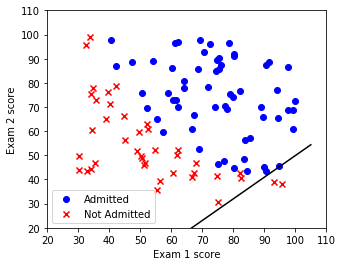

[ Iteration 25 ] cost = 0.615001101391


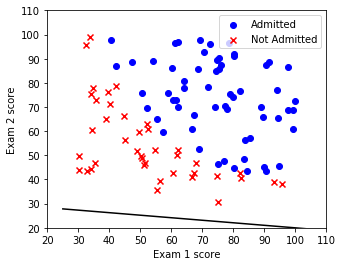

[ Iteration 50 ] cost = 0.563160439529


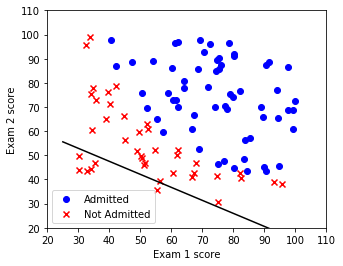

[ Iteration 75 ] cost = 0.521848067363


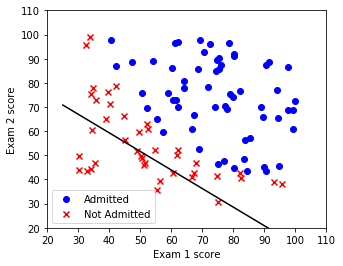

[ Iteration 100 ] cost = 0.488502745052


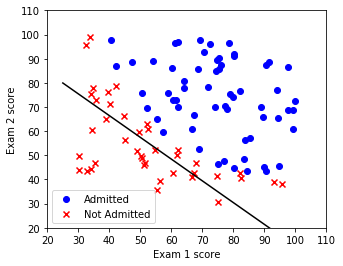

[ Iteration 125 ] cost = 0.461195648324


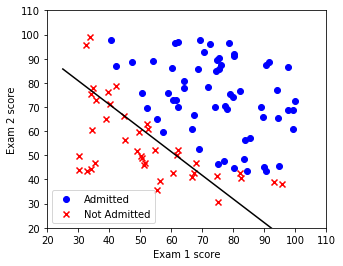

[ Iteration 150 ] cost = 0.438506317403


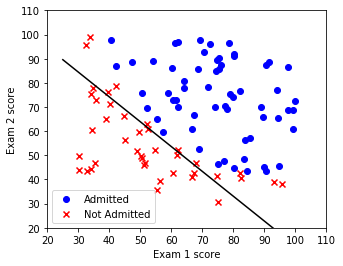

[ Iteration 175 ] cost = 0.419393874244


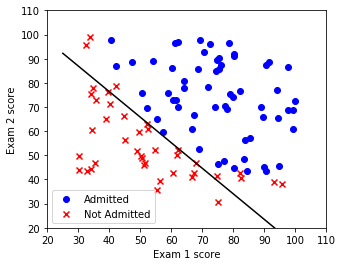

[ Iteration 200 ] cost = 0.403091755094


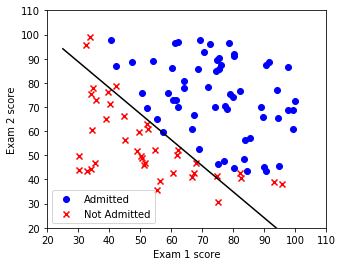

[ Iteration 225 ] cost = 0.389029533171


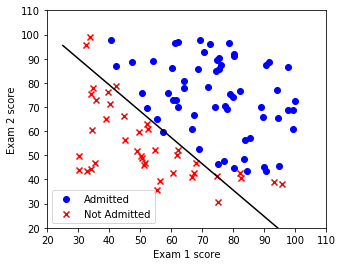

[ Iteration 250 ] cost = 0.376777220252


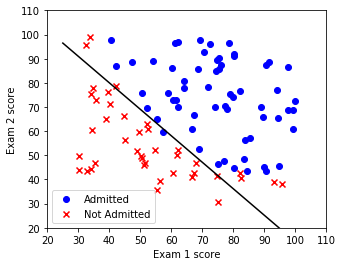

[ Iteration 275 ] cost = 0.366006189571


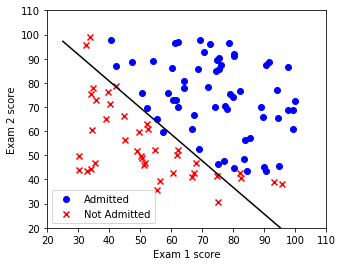

[ Iteration 300 ] cost = 0.356461805308


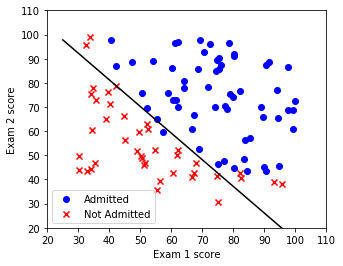

[ Iteration 325 ] cost = 0.347944140557


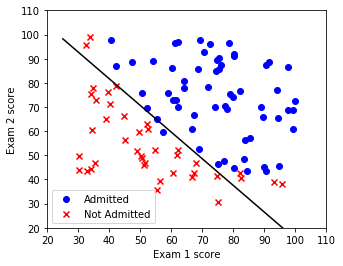

[ Iteration 350 ] cost = 0.340294260415


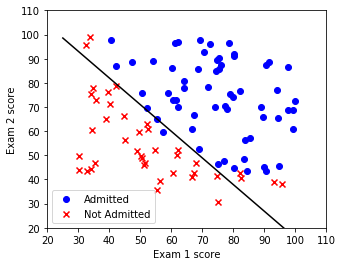

[ Iteration 375 ] cost = 0.333384348848


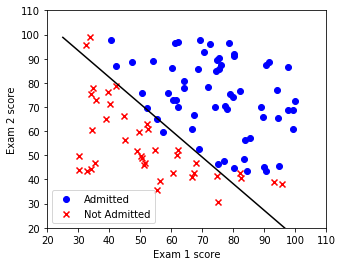

[ Iteration 400 ] cost = 0.327110512485


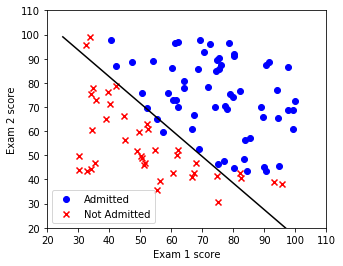

In [21]:
def gradient_descent(theta, X, y, alpha=1e-2, max_iterations=400):
    """ Batch gradient descent algorithm """
    #################################################################
    # Update the parameter 'theta' iteratively to minimize the cost #
    # Also visualize the decision boundary during learning          #
    #################################################################
    
    alpha *= X.shape[0]
    iteration = 0
    
    
    ### IMPORTANT: To avoid repeat caculation, the following two steps should be outside 
    ### the 'gradient_decent' function. However, we do them here because it will be easier 
    ### for you to visualize the decision boundary next. 
    ###
    ### 1) Do a simple feature scaling (scale each feature by its maximum absolute value) 
    ###    to convert feature value to [-1,1] range;  
    ### 2) Remember to add x0=1 into the X
    ###

    
    ### YOUR CODE HERE: 
    
    X_initial = X
    X = X/np.max(np.abs(X),axis=0)
    
    x0 = np.ones((X.shape[0],1))
    X = np.hstack((x0,X))
    X_normalized = X
    
    ### END YOUR CODE
    
    
    
    while(iteration < max_iterations):
        iteration += 1
        
        ### YOUR CODE HERE: simultaneous update of partial gradients
    
        theta = theta - (alpha*gradient_update(theta, X, y))
        
        
        
        ### END YOUR CODE

        
        # For every 20 iterations
        if iteration % 25 == 0 or iteration == 1:
            cost = 0
            
            ### YOUR CODE HERE: calculate the cost
            ### IMPORTANT: The cost function is guaranteed to decrease after 
            ## every iteration of the gradient descent algorithm.
                 
            cost = cost_function(theta, X, y)
            X = X_initial
            
            
            ### END YOUR CODE
            
            print ("[ Iteration", iteration, "]", "cost =", cost)
            plt.rcParams['figure.figsize'] = (5.0, 4.0)
            plt.xlim([20,110])
            plt.ylim([20,110])
            
            pos = np.where(y == 1)
            neg = np.where(y == 0)
            
            plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
            plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
            plt.xlabel('Exam 1 score')
            plt.ylabel('Exam 2 score')
            plt.legend(['Admitted', 'Not Admitted'])
            t = np.arange(10, 100, 0.1)
            
            
            ### YOUR CODE HERE: plot the decision boundary
            ### IMPORTANT: if you have done the feature scaling, make sure to scale back when ploting 
            ### the decision boundaries (it is tricky)
            
            xx = np.linspace(25, 105)
            yy = -(theta[1]/theta[2])*xx*(np.max(np.abs(X),axis=0)[1]/np.max(np.abs(X),axis=0)[0])  - (theta[0]/theta[2])*np.max(np.abs(X),axis=0)[1]
            plt.plot(xx, yy, 'k-')
            
            X = X_normalized
            
            ### END YOUR CODE 
            
            plt.show()
               
    return theta


### YOUR CODE HERE: initialize the parameters 'theta' to random values

initial_theta = np.random.randn(train_X.shape[1]+1)

### END YOUR CODE


learned_theta = gradient_descent(initial_theta, train_X, train_y)

## 7. Predicting [5 points]
Now that you learned the parameters of the model, you can use the model to prdict whether a particular student will be admited. The 'predict' function should output the probabilities of being classified as positive. 

In [22]:
def predict(theta, X):
    """ Predict whether the label is 0 or 1 using learned logistic regression parameters """

    ### YOUR CODE HERE: 
    ### IMPORTANT: If you have done the feature scaling for training (in 'gradient_descent), 
    ### you will need to do the exactly same scaling for predicting.
    
    X = X/np.max(np.abs(X),axis=0)
    
    x0 = np.ones((X.shape[0],1))
    X = np.hstack((x0,X))
    X_normalized = X
    
    probabilities = sigmoid(X_normalized.dot(theta))
    predicted_labels = np.array([1 if p>=0.5 else 0 for p in probabilities])
    
    ### END YOUR CODE
    
    
    ## convert an array of booleans 'predicted_labels' into an array of 0 or 1 intergers
    return probabilities, 1*predicted_labels 

# Check your predication function implementation
t_X1 = [[90, 90]]
t_X2 = [[50, 60]]
t_X3 = [[50, 50]]
print ("=== For autograder ===")
print (predict(learned_theta, t_X1))
print (predict(learned_theta, t_X2))
print (predict(learned_theta, t_X3))

# Computer accuracy on the training dateset 
t_prob, t_label = predict(learned_theta, train_X)
t_precision = t_label[np.where(t_label == train_y)].size / float(train_y.size) * 100
print ("=== For autograder ===")
print('Accuracy on the training set: %s%%' % round(t_precision,2))

=== For autograder ===
(array([ 0.9894832]), array([1]))
(array([ 0.9894832]), array([1]))
(array([ 0.9894832]), array([1]))
=== For autograder ===
Accuracy on the training set: 92.0%


### 7. Submit Your Homework
This is the end. Congratulations! 

Now, follow the steps below to submit your homework in [Carmen](https://carmen.osu.edu/):

1. rename this ipynb file to 'hw2_yourdotid.ipynb' 
2. In Jypyter Notebook, click on the menu 'File' --> 'Download as' --> 'Python (.py)'
3. pack both the above 'hw2_yourdotid.ipynb' file and the 'hw2_yourdotid.py' file into a zip file 'hw2_yourdotid.zip'
4. upload the zip file 'hw2_yourdotid.zip' in Carmen